Confusion Matrix:
 [[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



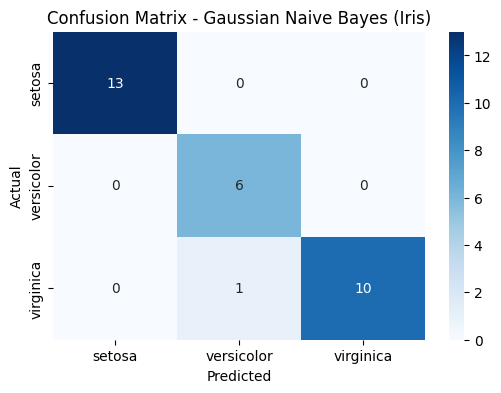

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = datasets.load_iris()

x, y = data.data, data.target

# Split data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=123
)

# Train Naive Bayes
NB = GaussianNB().fit(x_train, y_train)
pred = NB.predict(x_test)



# Print reports
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

# Plot confusion matrix using Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gaussian Naive Bayes (Iris)")
plt.show()


 Accuracy      : 93.33 %
 Precision     : 93.33 %
 Recall        : 93.33 %
 F1 Score      : 93.33 %

 Correct Predictions : 28
 Wrong Predictions   : 2

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.88      0.88      0.88         8
           2       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



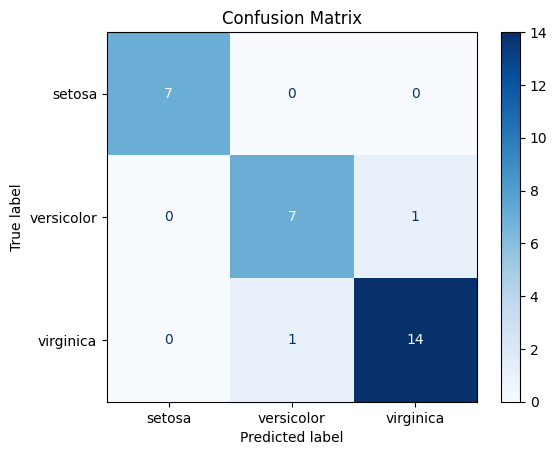

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt

# Load the dataset
irisData = load_iris()
X = irisData.data
y = irisData.target

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=435)

# KNN with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Correct/Wrong Predictions
correct = sum(y_pred == y_test)
wrong = sum(y_pred != y_test)

# Print Results
print(f"\n Accuracy      : {round(accuracy * 100, 2)} %")
print(f" Precision     : {round(precision * 100, 2)} %")
print(f" Recall        : {round(recall * 100, 2)} %")
print(f" F1 Score      : {round(f1 * 100, 2)} %")

print(f"\n Correct Predictions : {correct}")
print(f" Wrong Predictions   : {wrong}")

# Classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=irisData.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [8]:
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Calculate correlation matrix
correlation_matrix = df.corr()
correlation_matrix.to_csv("iris_correlation.csv", index=True)
print("Correlation matrix saved to 'iris_correlation.csv'.")

# Print correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# Calculate covariance matrix
covariance_matrix = df.cov()
covariance_matrix.to_csv("iris_covariance.csv", index=True)
print("Covariance matrix saved to 'iris_covariance.csv'.")

# Print covariance matrix
print("\nCovariance matrix:")
print(covariance_matrix)

Correlation matrix saved to 'iris_correlation.csv'.
Correlation matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  
Covariance matrix saved to 'iris_covariance.csv'.

Covariance matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           0.685694         -0.042434           1.274315   
sepal width (cm)           -0.042434          0.189979          -0.329656   
petal length (cm)           1.274315         -0.329

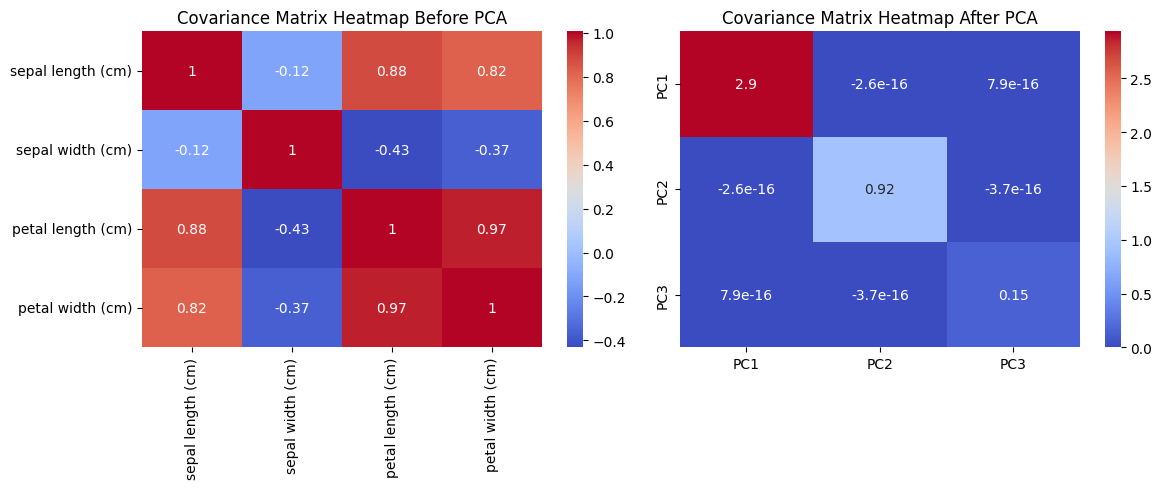

Total variance before PCA: 3.9999999999999987
Total variance after PCA: 3.97928516357138


In [9]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Iris dataset and convert into DataFrame
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Covariance matrix before PCA
cov_before = np.cov(X_scaled.T)
 
# PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Covariance matrix after PCA
cov_after = np.cov(X_pca.T)

# Plot heatmap of covariance matrix before PCA
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.heatmap(cov_before, annot=True, cmap='coolwarm', 
            xticklabels=iris.feature_names, yticklabels=iris.feature_names)
plt.title('Covariance Matrix Heatmap Before PCA')

# Plot heatmap of covariance matrix after PCA
plt.subplot(1, 2, 2)
sns.heatmap(cov_after, annot=True, cmap='coolwarm',
            xticklabels=[f'PC{i+1}' for i in range(cov_after.shape[0])],
            yticklabels=[f'PC{i+1}' for i in range(cov_after.shape[0])])
plt.title('Covariance Matrix Heatmap After PCA')

plt.tight_layout()
plt.show()

# Print variance before and after PCA
print("Total variance before PCA:", np.sum(np.var(X_scaled, axis=0)))
print("Total variance after PCA:", np.sum(np.var(X_pca, axis=0)))